***
# **BANK MARKETING ANALYSIS AND PREDICTION**
***

# 
<tr>
        <td>
            <div align="right">
                <font size=4px>
                    <b>- USING ML AND POWERBI
                    </b>
                </font>
            </div>
        </td>
    </tr>

***
## Introduction
***


Today organizations, which hire marketing management are analysis of organization's marketing data which is one of the most typical applications of data science and machine learning. Such analysis will definetely be a good contribution to the institution.Prediction of the results of the marketing campaign for each customer and clarification of factors which affect the campaign results. This helps to find out the ways how to make marketing campaigns more efficient. Finding out customer segments, using data for customers, who subscribed to term deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns


`Problem Statement`


  Improve bank marketing of a bank by analyzing their past marketing campaign data and recommending which customer to target. Predicting the future results of marketing compaigns based on available statistics and, accordingly, formulating recommendations for such companies in the future. Building a profile of a consumer of banking services (deposits).

 `Objective`

   The aim of this project is to devise such a machine leaning prediction algorithm, the bank can better target its customers and channelize its marketing efforts.

## Data Definition
---

**Input Variables**

**1.age** :numerical value

**2.Job** : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

**3.Marital** : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

**4.Education** (categorical: 'primary', 'secondary', 'Teritary', 'unknown')

**5.Default**: has credit in default? (categorical: 'no', 'yes', 'unknown')

**6.Housing**: has housing loan? (categorical: 'no', 'yes', 'unknown')

**7.Loan**: has personal loan? (categorical: 'no', 'yes', 'unknown')

**8.Related with the last contact of the current campaign:**

**9.Contact**: contact communication type (categorical: 'cellular','telephone') 

**10.Month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

**11.Day_of_week**: last contact day of the week ('numerical')

**12.Duration**: last contact duration, in days (numeric). 


**Output variable (Target Variable)**

**14.Deposit** : has the client subscribed a term deposit? (binary: 'yes', 'no')


***
## 1.Import Data From MySQL Database
***

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings('ignore')
import mysql.connector as mysql

## 1.1 MySQL Connect

In [3]:
db=mysql.connect(host="localhost",user="root",password="Naveenb@22",database="Capstone",auth_plugin="mysql_native_password")
db

In [4]:
#set cursor object
mycursor=db.cursor()
mycursor=db.cursor(buffered=True,dictionary=True)

## 1.2 Read Data From MySQL Database

In [5]:
#Access table from database
mycursor.execute('SELECT * FROM `bank marketing analysis1`')

In [6]:
df=pd.DataFrame(mycursor.fetchall())
df=df.copy()
df

,Id,age,job,marital,education,default,Acc_balance,housing,loan,contact,day,month,duration,campaign,poutcome,deposit
0,1001,45,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,1002,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,1003,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,1004,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,1005,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5996,21,student,single,secondary,no,232,yes,no,unknown,21,may,110,2,unknown,no
4996,5997,31,management,single,tertiary,no,385,yes,no,unknown,21,may,304,1,unknown,no
4997,5998,34,blue-collar,married,secondary,no,5304,yes,no,unknown,21,may,51,2,unknown,no
4998,5999,35,management,single,tertiary,no,71,yes,no,unknown,21,may,836,12,unknown,no


***
## 2. Exploratory Data Analysis
***

In [7]:
# remove duplicates data, if any...
df = df.drop_duplicates()
df.shape

(5000, 16)

In [8]:
#display first few rows of data
df.head()

,Id,age,job,marital,education,default,Acc_balance,housing,loan,contact,day,month,duration,campaign,poutcome,deposit
0,1001,45,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,1002,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,1003,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,1004,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,1005,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no


In [9]:
#display last few rows of data
df.tail()

,Id,age,job,marital,education,default,Acc_balance,housing,loan,contact,day,month,duration,campaign,poutcome,deposit
4995,5996,21,student,single,secondary,no,232,yes,no,unknown,21,may,110,2,unknown,no
4996,5997,31,management,single,tertiary,no,385,yes,no,unknown,21,may,304,1,unknown,no
4997,5998,34,blue-collar,married,secondary,no,5304,yes,no,unknown,21,may,51,2,unknown,no
4998,5999,35,management,single,tertiary,no,71,yes,no,unknown,21,may,836,12,unknown,no
4999,6000,32,technician,single,unknown,no,317,yes,no,unknown,21,may,394,2,unknown,no


In [10]:
df.shape

(5000, 16)

In [11]:
df.columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'Acc_balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'poutcome', 'deposit'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           5000 non-null   int64 
 1   age          5000 non-null   int64 
 2   job          5000 non-null   object
 3   marital      5000 non-null   object
 4   education    5000 non-null   object
 5   default      5000 non-null   object
 6   Acc_balance  5000 non-null   int64 
 7   housing      5000 non-null   object
 8   loan         5000 non-null   object
 9   contact      5000 non-null   object
 10  day          5000 non-null   int64 
 11  month        5000 non-null   object
 12  duration     5000 non-null   int64 
 13  campaign     5000 non-null   int64 
 14  poutcome     5000 non-null   object
 15  deposit      5000 non-null   object
dtypes: int64(6), object(10)
memory usage: 664.1+ KB


In [13]:
#numerical data summary
df.describe()

,Id,age,Acc_balance,day,duration,campaign
count,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,3500.500000,40.413200,957.44980,12.36780,270.343000,2.375000
std,1443.520003,9.414913,2462.19643,5.00607,257.151494,2.739539
min,1001.000000,20.000000,-3313.00000,5.00000,2.000000,1.000000
25%,2250.750000,33.000000,56.00000,8.00000,122.000000,1.000000
50%,3500.500000,40.000000,304.00000,13.00000,198.000000,2.000000
75%,4750.250000,47.000000,894.50000,16.00000,325.000000,3.000000
max,6000.000000,61.000000,58544.00000,21.00000,3366.000000,63.000000


In [14]:
df[['Id', 'age', 'Acc_balance']].describe()

,Id,age,Acc_balance
count,5000.000000,5000.000000,5000.00000
mean,3500.500000,40.413200,957.44980
std,1443.520003,9.414913,2462.19643
min,1001.000000,20.000000,-3313.00000
25%,2250.750000,33.000000,56.00000
50%,3500.500000,40.000000,304.00000
75%,4750.250000,47.000000,894.50000
max,6000.000000,61.000000,58544.00000


In [15]:
df.dropna() 

,Id,age,job,marital,education,default,Acc_balance,housing,loan,contact,day,month,duration,campaign,poutcome,deposit
0,1001,45,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,1002,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,1003,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,1004,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,1005,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5996,21,student,single,secondary,no,232,yes,no,unknown,21,may,110,2,unknown,no
4996,5997,31,management,single,tertiary,no,385,yes,no,unknown,21,may,304,1,unknown,no
4997,5998,34,blue-collar,married,secondary,no,5304,yes,no,unknown,21,may,51,2,unknown,no
4998,5999,35,management,single,tertiary,no,71,yes,no,unknown,21,may,836,12,unknown,no


In [16]:
#Drop column "poutcome" which is useless
df = df.drop('poutcome', axis=1)

### 2.1 Checking Missing Values

In [17]:
# Check if missing values exist or not
df.isnull().sum()

Id             0
age            0
job            0
marital        0
education      0
default        0
Acc_balance    0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
deposit        0
dtype: int64

In [18]:
#find percentage of missing values for each column

missing_values = df.isnull().mean()*100
missing_values.sum()

0.0

### 2.2 Data Visualization - PowerBI Report

Is the process of graphical representation to visual data such as plots, charts.

In [1]:
#visualization by Power Bi
from powerbiclient import Report,models

In [2]:
# Import the DeviceCodeLoginAuthentication class to authenticate against Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

# Initiate device authentication
device_auth = DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code IX2FPVXFV to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [7]:
grop_id="4f389ccc-3ec9-4b85-8eef-be39063e6517"
rept_id="4930b87c-01d3-44ca-8a99-1253a0e51f04"

In [8]:
report=Report(group_id=grop_id,report_id=rept_id ,auth=device_auth)

In [9]:
report

Report()

<function matplotlib.pyplot.show(close=None, block=None)>

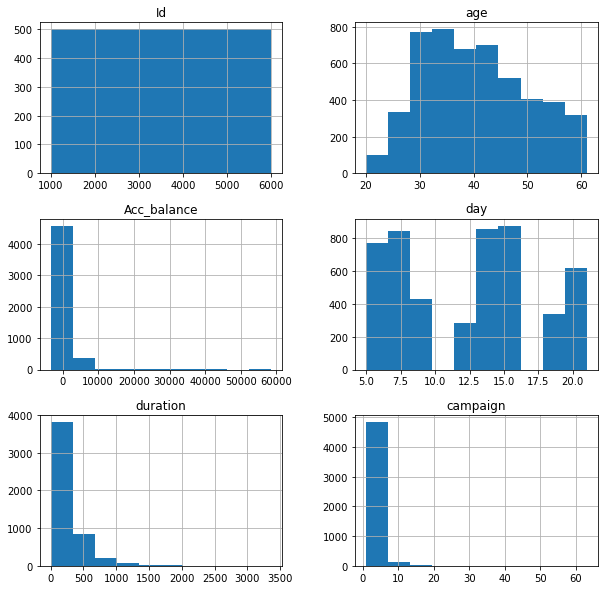

In [19]:
#plot histogram on numerial data
import matplotlib.pyplot as plt
df.hist(figsize =(10, 10))
plt.show

### 2.3 Visualizing Catagorical Variable

In [20]:
def bar_plot(variable):
    var =df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(5,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)    
    plt.show()

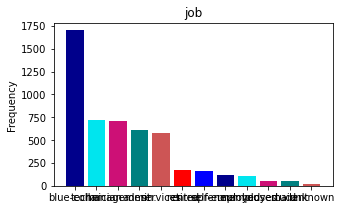

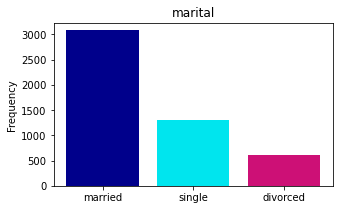

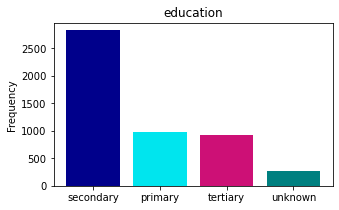

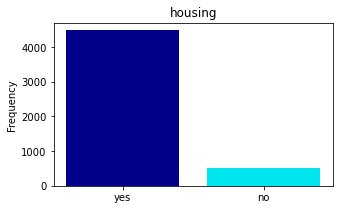

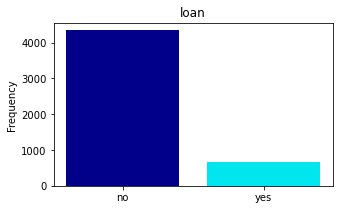

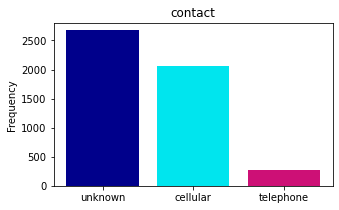

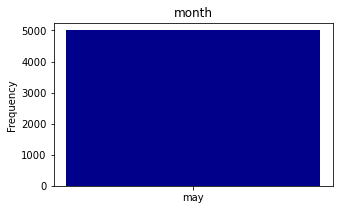

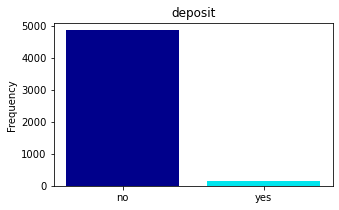

In [21]:
categoryc = ["job","marital","education", "housing", "loan","contact","month","deposit"]
for c in categoryc:
    bar_plot(c)

### 2.4 Visualizing Numerical Value

<AxesSubplot:xlabel='age', ylabel='Density'>

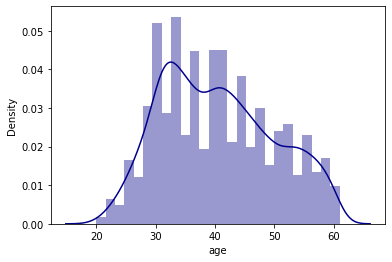

In [22]:
sns.distplot(df['age'],kde=True,color='Darkblue')

In [23]:
def plot_hist(variable):
    plt.figure(figsize=(9,6))
    plt.hist(df[variable], bins=40,color='#cd1076')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

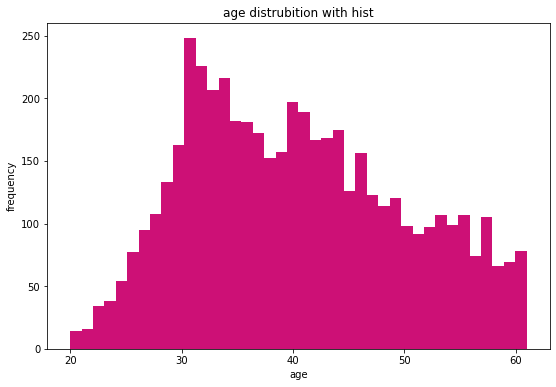

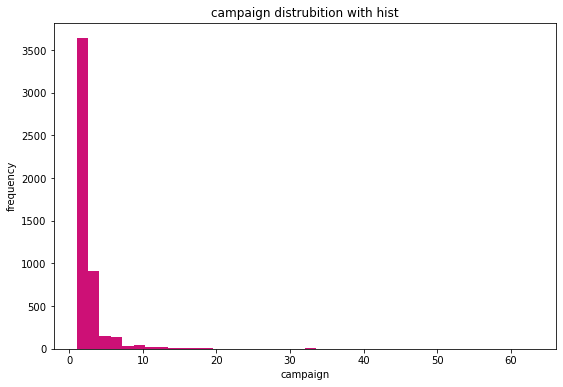

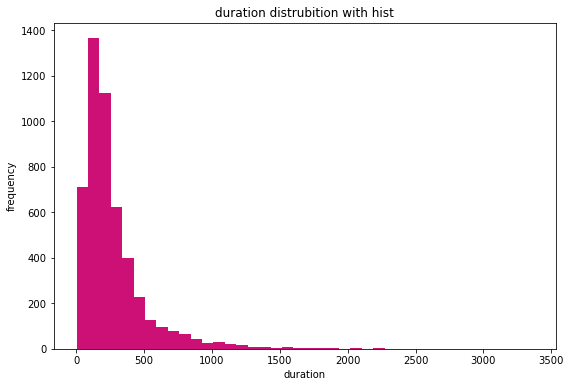

In [24]:
numericVar = ["age","campaign","duration"]
for n in numericVar:
    plot_hist(n)

## 3. Analysis of the response column

<AxesSubplot:title={'center':'Deposit value counts'}>

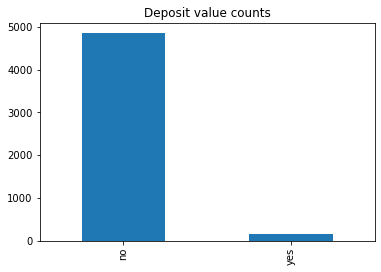

In [25]:
value_counts = df['deposit'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')

<AxesSubplot:title={'center':'Job and deposit'}>

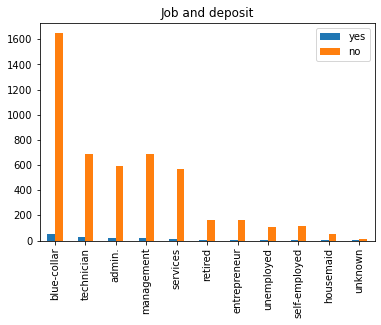

In [26]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

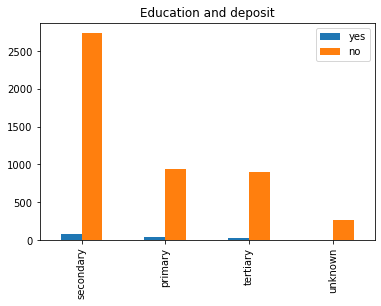

In [27]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

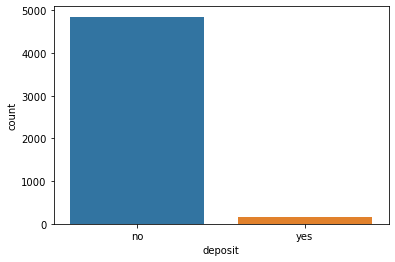

In [28]:
# Count of the Target label

sns.countplot(x='deposit',data=df)
plt.show()

***
## 4. Data Preprocessing
***

In [29]:
#correlations between numerical features
df.corr()

,Id,age,Acc_balance,day,duration,campaign
Id,1.000000,-0.100668,0.131459,0.989277,0.018278,0.158740
age,-0.100668,1.000000,0.084815,-0.098424,-0.019894,0.038439
Acc_balance,0.131459,0.084815,1.000000,0.137192,0.028741,-0.014693
day,0.989277,-0.098424,0.137192,1.000000,0.013901,0.138356
duration,0.018278,-0.019894,0.028741,0.013901,1.000000,-0.037301
campaign,0.158740,0.038439,-0.014693,0.138356,-0.037301,1.000000


### 4.1 Plot heatmap for check correlation of data

Text(0.5, 1.0, 'Correlation Heatmap')

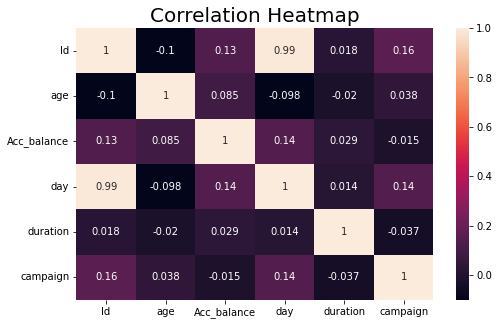

In [30]:
#see correlation between variables through a correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap', fontsize=20)

***
## 5. Outlier Detection
***

<AxesSubplot:xlabel='age'>

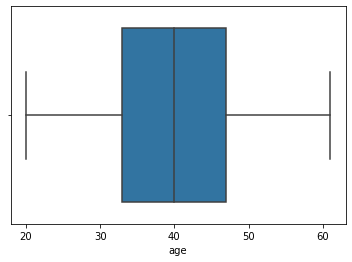

In [31]:
sns.boxplot(df['age'])

In [32]:
numericVar1 = ["age","Acc_balance","duration"]

In [33]:
def Outdet(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    return LR,UR

LR,UR=Outdet(df)
print("The Lower Quartile outliers are :\n",LR)
print("The Upper Quartile outliers are :\n ",UR)

The Lower Quartile outliers are :
 Id            -1498.50
age              12.00
Acc_balance   -1201.75
day              -4.00
duration       -182.50
campaign         -2.00
dtype: float64
The Upper Quartile outliers are :
  Id             8499.50
age              68.00
Acc_balance    2152.25
day              28.00
duration        629.50
campaign          6.00
dtype: float64


In [34]:
# IQR
Q1 = np.percentile(df['Acc_balance'], 25,
                   interpolation = 'midpoint') 
Q3 = np.percentile(df['Acc_balance'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Acc_balance'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Acc_balance'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (5000, 15)
Outliers are: (array([  34,   40,   65,   69,   70,   83,  129,  186,  187,  205,  244,
        249,  257,  323,  334,  382,  391,  428,  446,  493,  510,  533,
        560,  565,  569,  582,  592,  613,  615,  617,  618,  628,  630,
        719,  756,  757,  794,  866,  908,  916,  920, 1015, 1046, 1069,
       1086, 1111, 1120, 1130, 1157, 1193, 1213, 1229, 1236, 1241, 1254,
       1271, 1272, 1283, 1292, 1307, 1323, 1336, 1411, 1438, 1470, 1481,
       1490, 1535, 1560, 1584, 1606, 1629, 1634, 1642, 1717, 1718, 1723,
       1750, 1760, 1788, 1809, 1825, 1827, 1843, 1892, 1893, 1917, 1922,
       1962, 1964, 1966, 1979, 1980, 1981, 1997, 2008, 2019, 2048, 2055,
       2058, 2065, 2074, 2089, 2091, 2098, 2101, 2108, 2144, 2154, 2185,
       2228, 2233, 2234, 2251, 2265, 2278, 2301, 2343, 2348, 2349, 2366,
       2416, 2428, 2433, 2439, 2443, 2445, 2448, 2449, 2455, 2456, 2464,
       2467, 2471, 2473, 2479, 2492, 2500, 2502, 2503, 2508, 2512, 2519,
       2546, 

In [35]:
# IQR
Q1 = np.percentile(df['duration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['duration'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['duration'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (5000, 15)
Outliers are: (array([  37,   43,   53,   59,   61,   83,   86,   87,  109,  130,  152,
        168,  170,  179,  181,  182,  224,  231,  232,  241,  249,  271,
        291,  330,  347,  351,  372,  388,  390,  394,  411,  430,  431,
        446,  467,  471,  474,  512,  569,  600,  624,  626,  663,  670,
        694,  725,  728,  785,  814,  815,  817,  849,  853,  857,  877,
        897,  930,  934,  956,  960,  987,  998, 1002, 1007, 1015, 1018,
       1034, 1065, 1086, 1087, 1121, 1124, 1131, 1138, 1140, 1172, 1173,
       1189, 1193, 1198, 1210, 1239, 1247, 1273, 1283, 1298, 1316, 1323,
       1346, 1355, 1372, 1391, 1416, 1421, 1462, 1487, 1520, 1524, 1563,
       1575, 1596, 1648, 1662, 1671, 1674, 1691, 1698, 1731, 1749, 1763,
       1767, 1795, 1806, 1810, 1832, 1850, 1851, 1860, 1863, 1885, 1894,
       1899, 1900, 1917, 1952, 1975, 1986, 2033, 2036, 2046, 2051, 2096,
       2130, 2138, 2147, 2153, 2158, 2161, 2167, 2185, 2190, 2192, 2203,
       2260, 

### 5.1 Boxplot on numerical features to find outliers

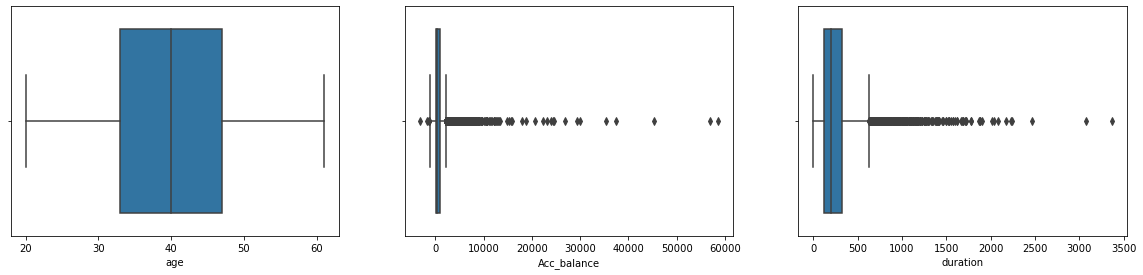

In [36]:
# Boxplot on numerical features to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numericVar1 in numericVar1:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numericVar1])
    plt.xlabel(numericVar1)
    plotnumber+=1
plt.show()

***
##  6. Algorithm works
***

***
### 6.1 Logistic Regression
***

In [37]:
df.deposit=df.deposit.replace("yes",1)
df.deposit=df.deposit.replace("no",0)
df

,Id,age,job,marital,education,default,Acc_balance,housing,loan,contact,day,month,duration,campaign,deposit
0,1001,45,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,1002,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,1003,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,1004,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,1005,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5996,21,student,single,secondary,no,232,yes,no,unknown,21,may,110,2,0
4996,5997,31,management,single,tertiary,no,385,yes,no,unknown,21,may,304,1,0
4997,5998,34,blue-collar,married,secondary,no,5304,yes,no,unknown,21,may,51,2,0
4998,5999,35,management,single,tertiary,no,71,yes,no,unknown,21,may,836,12,0


In [38]:
#logistic regression
df=pd.get_dummies(df)
df

,Id,age,Acc_balance,day,duration,campaign,deposit,job_admin.,job_blue-collar,job_entrepreneur,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_may
0,1001,45,2143,5,261,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,1
1,1002,44,29,5,151,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,1
2,1003,33,2,5,76,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,1
3,1004,47,1506,5,92,1,0,0,1,0,...,1,0,0,1,1,0,0,0,1,1
4,1005,33,1,5,198,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5996,21,232,21,110,2,0,0,0,0,...,1,0,0,1,1,0,0,0,1,1
4996,5997,31,385,21,304,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,1
4997,5998,34,5304,21,51,2,0,0,1,0,...,1,0,0,1,1,0,0,0,1,1
4998,5999,35,71,21,836,12,0,0,0,0,...,1,0,0,1,1,0,0,0,1,1


### 6.1.1 Splitting the data into x and y

In [39]:
x=df.drop('deposit', axis=1)
y=df['deposit']

### 6.1.2 Splitting the data into Train and Test Splits

In [40]:
#LogisticRegression
#splitting
from sklearn.model_selection import train_test_split 
x_test,x_train,y_test,y_train=train_test_split (x,y,test_size=0.25,random_state=0)

In [41]:
#fitting
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
#prediction
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
#predicting the occurances of  probabilitiess for the data
model.predict_proba(x_test)

array([[9.86272154e-01, 1.37278458e-02],
       [9.99013311e-01, 9.86688761e-04],
       [9.99594810e-01, 4.05190402e-04],
       ...,
       [9.71870700e-01, 2.81293003e-02],
       [9.32559711e-01, 6.74402889e-02],
       [9.99427705e-01, 5.72295002e-04]])

In [44]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9682666666666667

In [45]:
confusion_matrix(y_test,y_pred)

array([[3613,   21],
       [  98,   18]], dtype=int64)

In [46]:
A=classification_report(y_test,y_pred)
print(A)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3634
           1       0.46      0.16      0.23       116

    accuracy                           0.97      3750
   macro avg       0.72      0.57      0.61      3750
weighted avg       0.96      0.97      0.96      3750



### 6.1.3 Logistic Regression accuracy

In [47]:
accuracies = {}
accuracy_score(y_test,y_pred)
Logistic_acc = accuracy_score(y_test,y_pred)*100
print("Logistic Regression accuracy:",Logistic_acc)
accuracies['Logistic Regression']=Logistic_acc

Logistic Regression accuracy: 96.82666666666667


***
### 6.2 Random Forest
***

In [48]:
#RandomForest
#fitting random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [49]:
#predicting the test set results
y__pred=classifier.predict(x_test)

In [50]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y__pred))

0.9696


In [51]:
#making confusion matrix
confusion_matrix(y_test,y__pred)

array([[3630,    4],
       [ 110,    6]], dtype=int64)

In [52]:
#classification report
B=classification_report(y_test,y__pred)
print(B) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3634
           1       0.60      0.05      0.10       116

    accuracy                           0.97      3750
   macro avg       0.79      0.53      0.54      3750
weighted avg       0.96      0.97      0.96      3750



### 6.2.1 Random Forest accuracy

In [53]:
Random_Forest_acc = accuracy_score(y_test,y__pred)*100
print("Random Forest accuracy:",Random_Forest_acc)
accuracies['Random Forest']=Random_Forest_acc

Random Forest accuracy: 96.96000000000001


***
### 6.3  DecisionTree Classifier
***

In [54]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
#prediction
ypred=model.predict(x_test)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,ypred)

0.9592

In [57]:
confusion_matrix(y_test,ypred)

array([[3567,   67],
       [  86,   30]], dtype=int64)

In [58]:
C=classification_report(y_test,ypred)
print(C)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3634
           1       0.31      0.26      0.28       116

    accuracy                           0.96      3750
   macro avg       0.64      0.62      0.63      3750
weighted avg       0.96      0.96      0.96      3750



### 6.3.1 Decision_Tree Accuracy

In [59]:
DecisionTree_acc = accuracy_score(y_test,ypred)*100
print("Decision_Tree:",DecisionTree_acc)
accuracies['Decision_Tree']=DecisionTree_acc

Decision_Tree: 95.92


***
### 6.4 K-Nearest Neighbor
***

In [60]:
#K_NN
#Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
#predicting the test set results
pred=classifier.predict(x_test)

In [62]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,pred)

0.968

In [63]:
#making confusion matrix
confusion_matrix(y_test,pred)

array([[3620,   14],
       [ 106,   10]], dtype=int64)

In [64]:
#classification report
D=classification_report(y_test,pred)
print(D) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3634
           1       0.42      0.09      0.14       116

    accuracy                           0.97      3750
   macro avg       0.69      0.54      0.56      3750
weighted avg       0.95      0.97      0.96      3750



### 6.4.1 KNN accuracy

In [65]:
KNN_acc = accuracy_score(y_test,pred)*100
print("KNN accuracy:",KNN_acc)
accuracies['KNN']=KNN_acc

KNN accuracy: 96.8


***
## 7. Comparision Of Accuracy
***

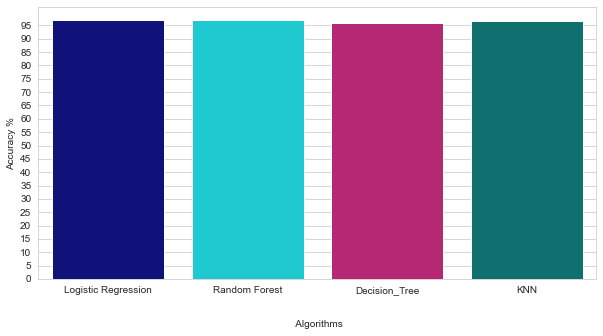

Logistic_acc =  96.82666666666667
Random_Forest_acc =  96.96000000000001
DecisionTree_acc =  95.92
KNN_acc =  96.8


In [66]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

print("Logistic_acc = ",Logistic_acc)
print("Random_Forest_acc = ",Random_Forest_acc)
print("DecisionTree_acc = ",DecisionTree_acc)
print("KNN_acc = ",KNN_acc)

***
## 8. Conclusion
***

   The customer's account balance has a huge influence on the campaign's outcome. People with account balance are more likely to subscribe for term deposit, so future address those customers.The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4.